# Walmart Sales Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('Downloads/Walmart Sales Data.csv')
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


## Generic questions

### 1. How many distinct cities present in the dataset?

In [2]:
new_df= len(df['City'].unique())
print(" count of Distinct cities:",new_df)

 count of Distinct cities: 3


### 2. In which city is each branch is situated?

In [3]:
new_df= pd.DataFrame(df, columns=['Branch','City'])
print(new_df)

    Branch       City
0        A     Yangon
1        C  Naypyitaw
2        A     Yangon
3        A     Yangon
4        A     Yangon
..     ...        ...
995      C  Naypyitaw
996      B   Mandalay
997      A     Yangon
998      A     Yangon
999      A     Yangon

[1000 rows x 2 columns]


## Product Analysis

### 1. How many distinct product lines ara there in the data set?

In [4]:
new_df= len(df['Product line'].unique())
print("count of distinct product lines:" ,new_df)

count of distinct product lines: 6


### 2. What is the most common payment method?

Payment Type  Number of payments
     Ewallet                 345
        Cash                 344
 Credit card                 311


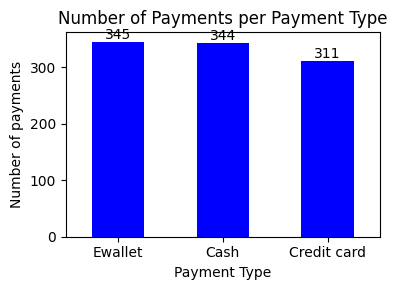

In [5]:
new_df = df['Payment'].value_counts().sort_values(ascending=False).reset_index(name='Number of payments')
new_df = new_df.rename(columns={'Payment': 'Payment Type'})
print(new_df.to_string(index=False))
# Plotting the bar chart
ax = new_df.plot(kind='bar', x='Payment Type', y='Number of payments', figsize=(4, 3), color='blue', legend=False)
# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black') 
plt.xlabel('Payment Type')
plt.ylabel('Number of payments')
plt.title('Number of Payments per Payment Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 3. What is the most selling product line?

          Product line  Number of sales
   Fashion accessories              178
    Food and beverages              174
Electronic accessories              170
     Sports and travel              166
    Home and lifestyle              160
     Health and beauty              152


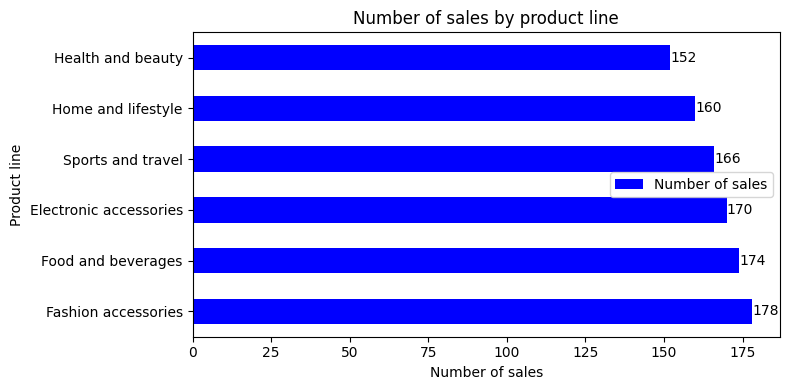

In [6]:
new_df=df['Product line'].value_counts().reset_index(name='Number of sales')
print(new_df.to_string(index=False))
ax = new_df.plot(kind='barh', figsize=(8,4), color=['blue'])
# Adding labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')
ax.set_yticks(new_df.index) 
ax.set_yticklabels(new_df['Product line'], color='black')
plt.xlabel('Number of sales')
plt.ylabel('Product line')
plt.title('Number of sales by product line')
plt.tight_layout()
plt.show()                 

### 4. What is the total revenue by month?

   Month  Total revenue
 January      116291.87
   March      109455.51
February       97219.37


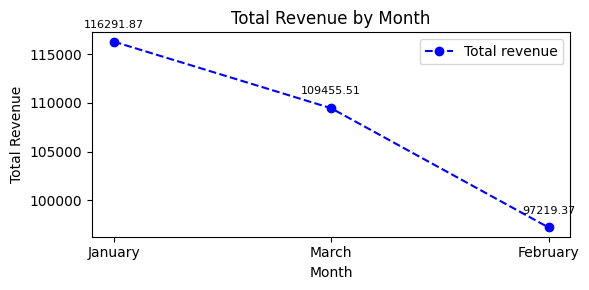

In [7]:
# Extract  a month from date
df['Month'] = pd.DatetimeIndex(df['Date']).month_name()
new_df= df.groupby('Month')['Total'].sum().round(2).sort_values(ascending= False).reset_index()
new_df= new_df.rename(columns={'Total':'Total revenue'})
print(new_df.to_string(index=False))
# Create a line plot
ax = new_df.plot(kind='line', x='Month', y='Total revenue', figsize=(6, 3), color='blue', marker='o', linestyle='--')
# Adding labels and title
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
# Customize x-ticks
ax.set_xticks(range(len(new_df)))
ax.set_xticklabels(new_df['Month'])
# Annotating the points
for i, txt in enumerate(new_df['Total revenue']):
    ax.annotate(txt, (i, new_df['Total revenue'][i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='black')
plt.tight_layout()
plt.show()


### 5. Which month recorded the highest cost of Goods sold(COGS)?

      Month  Total COGS
0  February    92589.88
1   January   110754.16
2     March   104243.34


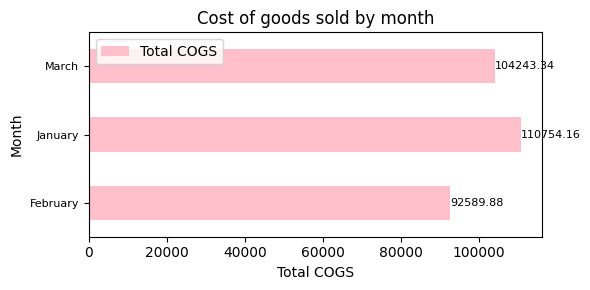

In [8]:
# Extract a month from date
df['Month'] = pd.DatetimeIndex(df['Date']).month_name()
new_df= df.groupby('Month')['cogs'].sum().reset_index(name='Total COGS')
print(new_df)
ax= new_df.plot(kind='barh', figsize=(6,3), color='pink')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=8, color='black')
ax.set_yticks(new_df.index)
ax.set_yticklabels(new_df['Month'], fontsize=8, color='black')
plt.xlabel('Total COGS' )
plt.ylabel('Month')
plt.title('Cost of goods sold by month')
plt.tight_layout()
plt.show()

### 6. Which product line generated highest revenue?

          Product line  Revenue
    Food and beverages 56144.84
     Sports and travel 55122.83
Electronic accessories 54337.53
   Fashion accessories 54305.90
    Home and lifestyle 53861.91
     Health and beauty 49193.74


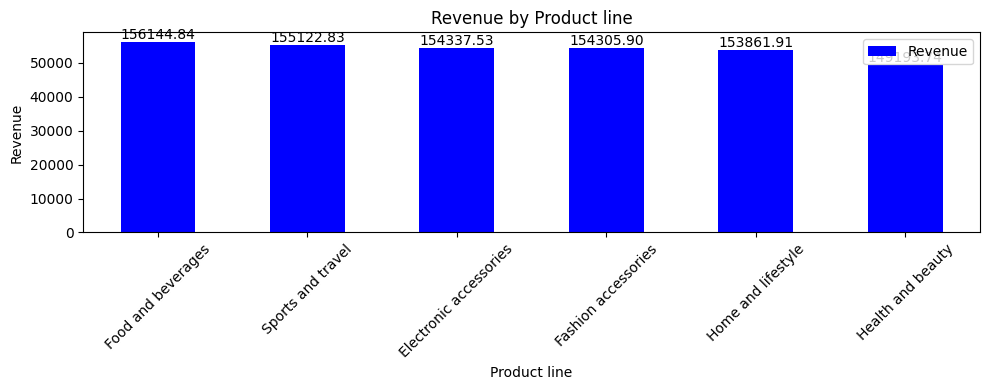

In [9]:
new_df= df.groupby('Product line')['Total'].sum().round(2).sort_values(ascending= False).reset_index(name='Revenue')
print(new_df.to_string(index=False))
ax = new_df.plot(kind='bar', figsize=(10,4), color=['blue'])
# Adding labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge',fmt='1%.2f', fontsize=10, color='black')
ax.set_xticks(new_df.index) 
ax.set_xticklabels(new_df['Product line'], color='black',rotation=45)
plt.xlabel('Product line')
plt.ylabel('Revenue')
plt.title('Revenue by Product line')
plt.tight_layout()
plt.show()        

### 7. Which city has the highest revenue?

In [10]:
new_df= df.groupby('City')['Total'].sum().sort_values(ascending= False)[:1].reset_index()
print(new_df.to_string(index=False))

     City       Total
Naypyitaw 110568.7065


### 8. Which product line incurred the highest VAT?

          Product line  Total VAT
Electronic accessories    2587.50
   Fashion accessories    2586.00
    Food and beverages    2673.56
     Health and beauty    2342.56
    Home and lifestyle    2564.85
     Sports and travel    2624.90


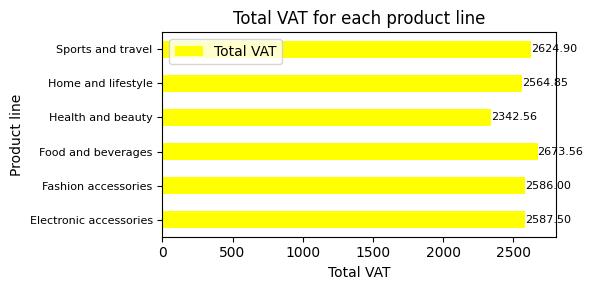

In [11]:
new_df= df.groupby('Product line')['Tax 5%'].sum().round(2).reset_index(name= 'Total VAT')
new_df= new_df.rename(columns={'Tax 5%':'VAT'})
print(new_df.to_string(index=False))
# Plottintg the horizontal bar chart
ax= new_df.plot(kind='barh', figsize=(6,3), color='yellow')
# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=8, color='black')
ax.set_yticks(new_df.index)
ax.set_yticklabels(new_df['Product line'], fontsize=8, color='black')
plt.xlabel('Total VAT' )
plt.ylabel('Product line')
plt.title('Total VAT for each product line')
plt.tight_layout()
plt.show()

### 9. Retreive each product line and add a column product_category indicating 'Good'or 'Bad', based on whether its sales are above the average?

In [12]:
average_sales= df['Total'].mean()
# Create a column product category
df['Product_category']= df['Total'].apply(lambda x: 'Good' if x > average_sales else 'Bad')
print(df[['Product line','Product_category']])

               Product line Product_category
0         Health and beauty             Good
1    Electronic accessories              Bad
2        Home and lifestyle             Good
3         Health and beauty             Good
4         Sports and travel             Good
..                      ...              ...
995       Health and beauty              Bad
996      Home and lifestyle             Good
997      Food and beverages              Bad
998      Home and lifestyle              Bad
999     Fashion accessories             Good

[1000 rows x 2 columns]


### 10. Which branch sold more products than average product sold?

In [13]:
# find average of the product sold
average_product_sold= df['Quantity'].mean()  
#sum of the product sold per branch
total_product_sold_per_branch = df.groupby('Branch')['Quantity'].sum()
above_Average_branches= total_product_sold_per_branch[total_product_sold_per_branch > average_product_sold]
top_branch= above_Average_branches.sort_values(ascending= False).head(1) 
#sort the top branch
print(top_branch)

Branch
A    1859
Name: Quantity, dtype: int64


### 11. What is the most common product line by gender?

Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                            84                   96                  90   
Male                              86                   82                  84   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female                       64                  79                 88  
Male                         88                  81                 78  


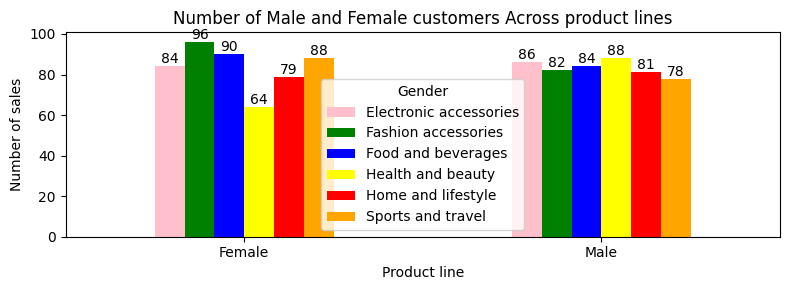

In [14]:
new_df= df.groupby(['Gender','Product line'], observed=True).size().unstack(1)
print(new_df)
ax = new_df.plot(kind='bar' ,figsize=(8, 3), color=['pink', 'green','blue','yellow','red','orange'])
# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black') 
plt.title("Number of Male and Female customers Across product lines")
plt.xlabel("Product line")
plt.ylabel("Number of sales")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

### 12. What is the average rating of each product line

          Product line  Average rating
    Home and lifestyle            6.84
Electronic accessories            6.92
     Sports and travel            6.92
     Health and beauty            7.00
   Fashion accessories            7.03
    Food and beverages            7.11


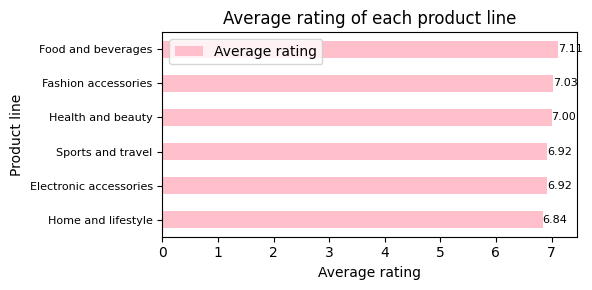

In [15]:
new_df= df.groupby('Product line')['Rating'].mean().round(2).sort_values(ascending=True).reset_index()
new_df= new_df.rename(columns={'Rating':'Average rating'})

print(new_df.to_string(index=False))
# Plotting the bar chart
ax= new_df.plot(kind='barh', figsize=(6,3), color='pink')
# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=8, color='black')
ax.set_yticks(new_df.index)
ax.set_yticklabels(new_df['Product line'], fontsize=8, color='black')
plt.xlabel('Average rating' )
plt.ylabel('Product line')
plt.title('Average rating of each product line')
plt.tight_layout()
plt.show()

## Sales Analysis

### 1. Number of sales made in each time of the day per weekday?

             Product line  Average rating
0      Home and lifestyle            6.84
1  Electronic accessories            6.92
2       Sports and travel            6.92
3       Health and beauty            7.00
4     Fashion accessories            7.03
5      Food and beverages            7.11


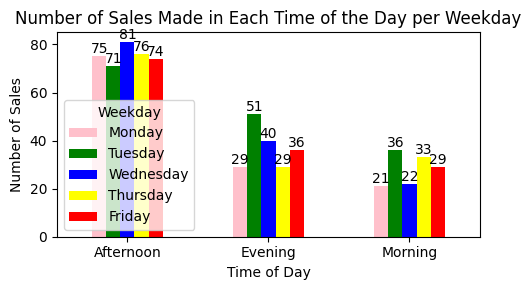

In [16]:
# Extract the hour from time and day from  the date.
df['hour'] = pd.DatetimeIndex(df['Time']).hour
df['Day'] = pd.DatetimeIndex(df['Date']).day_name()
df['time_of_day'] = df['hour'].apply(lambda hour: 'Morning' if 6 <= hour < 12 else 'Afternoon' if 12 <= hour < 18 else 'Evening' if 18 <= hour < 22 else 'Night')
print(new_df)
# Weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
# Group by time_of_day and weekday
new_df = df.groupby(['time_of_day', 'Day']).size().unstack(1).reindex(columns=weekday_order).fillna(0)
# Plotting the grouped bar chart
ax = new_df.plot(kind='bar', figsize=(5, 3), color=['pink', 'green', 'blue', 'yellow', 'red'])
# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black') 
plt.title("Number of Sales Made in Each Time of the Day per Weekday")
plt.xlabel("Time of Day")
plt.ylabel("Number of Sales")
plt.xticks(rotation=0)
plt.legend(title="Weekday")
plt.tight_layout()
plt.show()

### 2. Identify the customer type that generates the highest revenue

In [17]:
new_df= df.groupby('Customer type')['Total'].sum().round(2).sort_values(ascending= False).reset_index(name= 'Total')
print(new_df.to_string(index=False))

Customer type     Total
       Member 164223.44
       Normal 158743.30


### 3. Which city has the largest tax percent/VAT(Value Added Tax)?

In [18]:
new_df= df.groupby('City')['Tax 5%'].sum().sort_values(ascending=False).head(1)
print(new_df)

City
Naypyitaw    5265.1765
Name: Tax 5%, dtype: float64


### 4. Which customer type pays the most VAT?

In [19]:
new_df= df.groupby('Customer type')['Tax 5%'].sum().sort_values(ascending=False).head(1).reset_index()
new_df= new_df.rename(columns={'Tax 5%':'VAT'})
print(new_df.to_string(index=False))

Customer type      VAT
       Member 7820.164


## Customer Analysis

### 1. How many unique customer types does the data have?

In [20]:
new_df= len(df['Customer type'].unique())
print('count of unique customer types:',new_df)

count of unique customer types: 2


### 2. How many unique Payments methods does the data have?

In [21]:
new_df= len(df['Payment'].unique())
print('count of unique Payment methods:',new_df)

count of unique Payment methods: 3


### 3. which is the most common customer type?

In [22]:
new_df= df.groupby('Customer type')['Customer type'].value_counts().sort_values(ascending= False).head(1)
print(new_df)

Customer type
Member    501
Name: count, dtype: int64


### 4. What customer type buys the most?

In [23]:
new_df= df.groupby('Customer type')['Total'].sum().sort_values(ascending= False).head(1)
print(new_df)

Customer type
Member    164223.444
Name: Total, dtype: float64


### 5. What is the gender of most of the customers?

In [24]:
new_df= df['Gender'].value_counts().sort_values(ascending= False).sort_values(ascending= False)[:1]
print(new_df)


Gender
Female    501
Name: count, dtype: int64


### 6. What is the gender distribution per branch?

Branch  Female  Male
     A     161   179
     B     162   170
     C     178   150


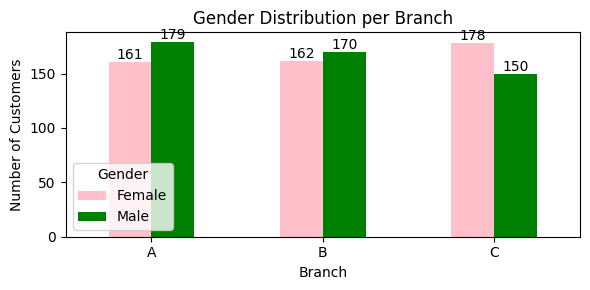

In [25]:
new_df = df.groupby(['Branch', 'Gender']).size().unstack()
new_df = new_df.reset_index()
print(new_df.to_string(index=False))
# Plotting the grouped bar chart
ax = new_df.plot(kind='bar',x='Branch', figsize=(6, 3), color=['pink', 'green', 'yellow'])
# Adding labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black') 
plt.title("Gender Distribution per Branch")
plt.xlabel("Branch")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

### 7. Which time_of_the day do customers give most rating?

time_of_day  Average Rating
  Afternoon            6.99
    Evening            6.94
    Morning            6.96


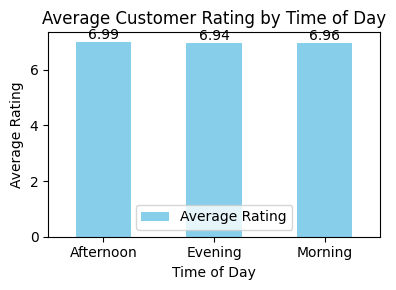

In [26]:
# Extract the hour from time
df['hour'] = pd.DatetimeIndex(df['Time']).hour
# Categorize the time of day
df['time_of_day'] = df['hour'].apply(lambda hour: 'Morning' if 6 <= hour < 12 else 
                                                  'Afternoon' if 12 <= hour < 18 else 
                                                  'Evening' if 18 <= hour < 22 else 'Night')
# Calculate average rating by time of day
time_of_day_ratings = df.groupby('time_of_day')['Rating'].mean().round(2).reset_index(name='Average Rating')
print(time_of_day_ratings.to_string(index=False))
# Plot the results
ax = time_of_day_ratings.plot(kind='bar', x='time_of_day', color='skyblue', figsize=(4, 3))
for container in ax.containers:
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=10, color='black')
plt.title('Average Customer Rating by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 8. Which time of the day do customers give most ratings per branch?

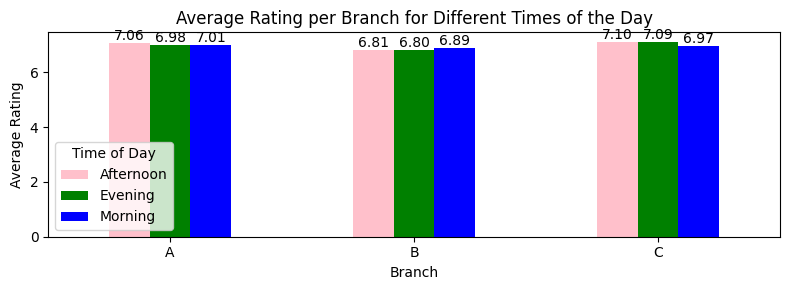

In [27]:
# Extract the hour and categorize time of 
df['hour'] = pd.DatetimeIndex(df['Time']).hour 
df['time_of_day'] = df['hour'].apply(lambda hour: 'Morning' if 6 <= hour < 12 else 'Afternoon' if 12 <= hour < 18 else 'Evening' if 18 <= hour < 22 else 'Night') 
# Calculate the overall average rating 
df['Average Rating'] = df['Rating'].mean().round(2) 
# Group by 'Branch' and 'time_of_day' and calculate the mean rating, then fill NaN values with 0 
new_df = df.groupby(['Branch', 'time_of_day'])['Rating'].mean().unstack().fillna(0).round(2) 
# Print the resulting dataframe print(new_df) 
# Plotting the grouped bar chart 
ax = new_df.plot(kind='bar', figsize=(8, 3), color=['pink', 'green', 'blue', 'yellow']) 
# Adding labels to the bars
for container in ax.containers: 
    ax.bar_label(container, fmt='%1.2f', label_type='edge', fontsize=10, color='black') 
# Adding labels and title
plt.title("Average Rating per Branch for Different Times of the Day") 
plt.xlabel("Branch") 
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.legend(title="Time of Day") 
# Adjust layout for better fit 
plt.tight_layout() 
# Display the plot 
plt.show()

### 9. Which day of the week has the has the best average rating?

      Day  Average Rating
   Monday            7.15
   Friday            7.08
   Sunday            7.01
  Tuesday            7.00
 Saturday            6.90
 Thursday            6.89
Wednesday            6.81


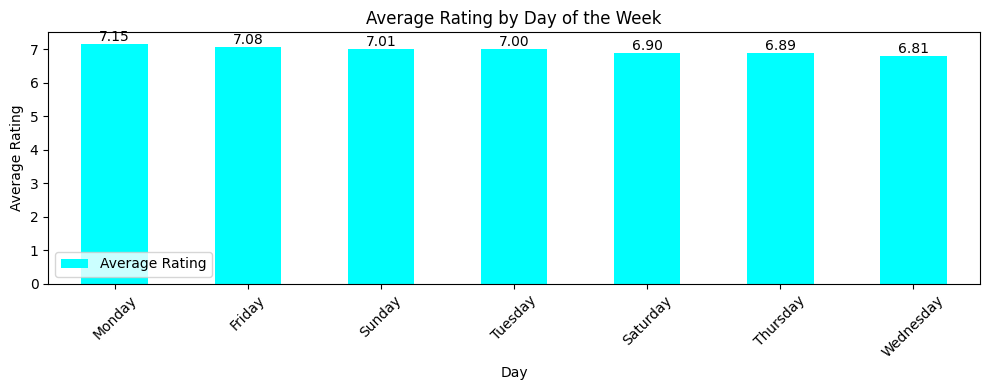

In [28]:
# Extract a day from date
df['Day']= pd.DatetimeIndex(df['Date']).day_name()
# Group by 'Day' and calculate the mean rating, then sort the values 
new_df = df.groupby('Day')['Rating'].mean().round(2).sort_values(ascending=False).reset_index(name='Average Rating') 
# Print the resulting dataframe
print(new_df.to_string(index=False)) 
# Plot the results 
ax = new_df.plot(kind='bar', figsize=(10, 4), color=['cyan']) 
# Adding labels to the bars
for container in ax.containers: 
    ax.bar_label(container, label_type='edge', fmt='%1.2f', fontsize=10, color='black')
# Customize x-axis tick labels 
ax.set_xticks(new_df.index) 
ax.set_xticklabels(new_df['Day'], color='black', rotation=45) 
# Adding labels and title
plt.xlabel('Day') 
plt.ylabel('Average Rating') 
plt.title('Average Rating by Day of the Week')
# Adjust layout for better fit
plt.tight_layout() 
# Display the plot 
plt.show()

### 10. Which day of the week  has the best average rating per branch?

In [29]:
# Extract a day from date
df['Day']= pd.DatetimeIndex(df['Date']).day_name()
df['Day'] = pd.DatetimeIndex(df['Date']).day_name() 
# Group by 'Branch' and 'Day' and calculate the mean rating, then sort the values 
new_df = df.groupby(['Branch', 'Day'])['Rating'].mean().sort_values(ascending=False).reset_index(name='Average rating')
# Print the resulting dataframe 
print(new_df)

   Branch        Day  Average rating
0       B     Monday        7.335897
1       A     Friday        7.312000
2       C     Friday        7.278947
3       C   Saturday        7.229630
4       A     Monday        7.097917
5       A     Sunday        7.078846
6       C  Wednesday        7.064000
7       A    Tuesday        7.058824
8       C     Monday        7.036842
9       C     Sunday        7.028261
10      B    Tuesday        7.001887
11      A   Thursday        6.958696
12      C    Tuesday        6.951852
13      C   Thursday        6.950000
14      A  Wednesday        6.916279
15      B     Sunday        6.888571
16      B   Thursday        6.752273
17      A   Saturday        6.746000
18      B   Saturday        6.736667
19      B     Friday        6.694118
20      B  Wednesday        6.452000
